In [ ]:
Exercise from https://github.com/nalamidi/Breast-Cancer-Classification-with-Support-Vector-Machine/blob/master/Breast%20Cancer%20Classification.ipynb
    
Project Task

In this study, my task is to classify tumors into malignant (cancer) or benign using features obtained from several cell images.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Attribute Information:

ID number
Diagnosis (M = malignant, B = benign)
Ten real-valued features are computed for each cell nucleus:

Radius (mean of distances from center to points on the perimeter)
Texture (standard deviation of gray-scale values)
Perimeter
Area
Smoothness (local variation in radius lengths)
Compactness (perimeter^2 / area - 1.0)
Concavity (severity of concave portions of the contour)
Concave points (number of concave portions of the contour)
Symmetry
Fractal dimension ("coastline approximation" - 1)    

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Import Cancer data from the Sklearn library
# Dataset can also be found here (http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29)

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

Create a dataframe from data

In [4]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [5]:
df_cancer.shape

(569, 31)

569 records with 31 features

# Visualize data

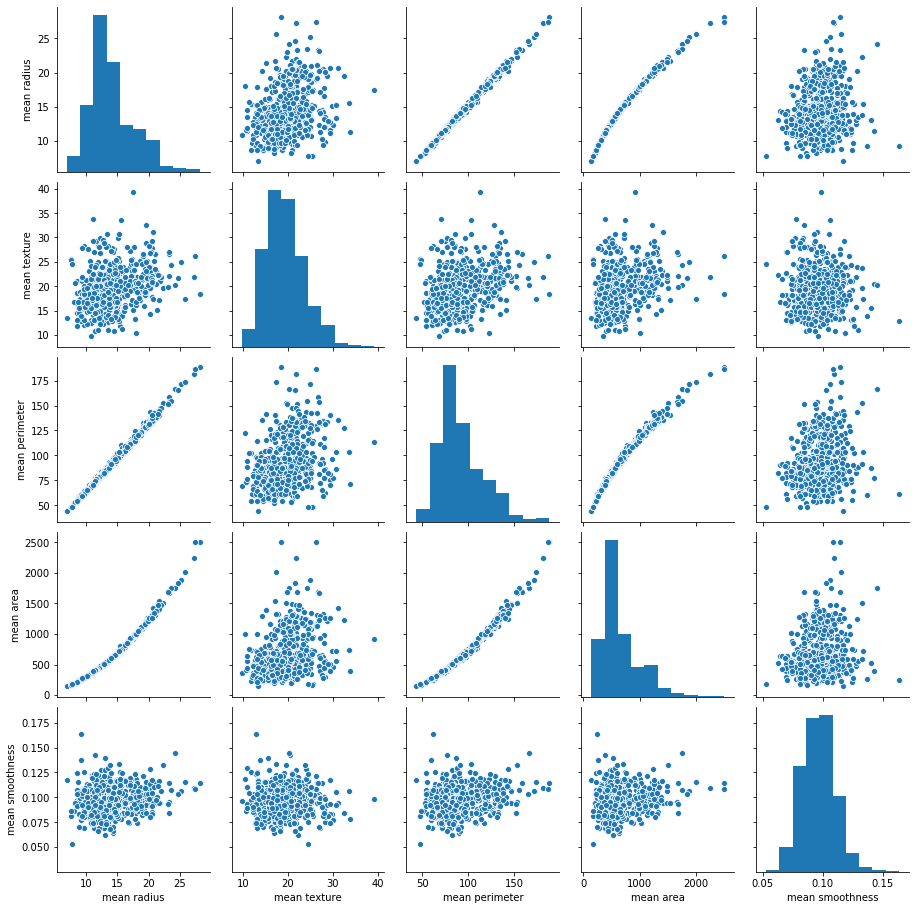

In [6]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(df_cancer, vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'] )

Colour by target

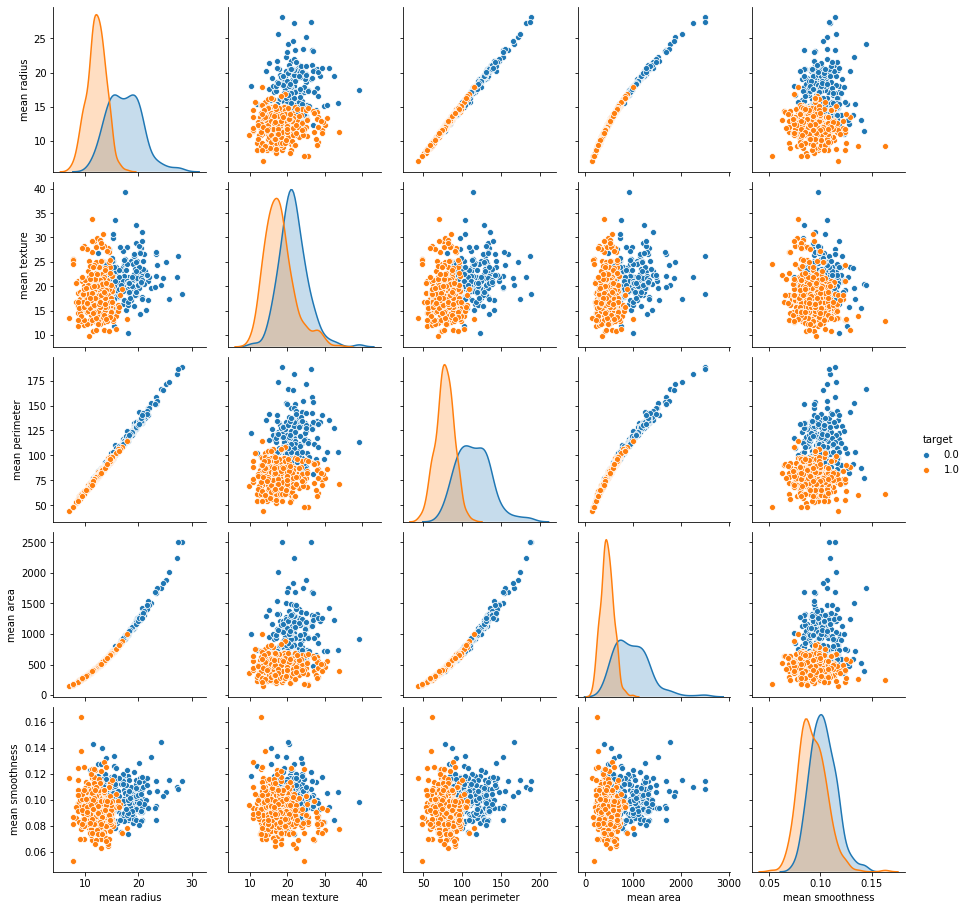

In [7]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'] )

Note:

1.0 (Orange) = Benign (No Cancer)

0.0 (Blue) = Malignant (Cancer)

# How many Benign and Malignant do we have in our dataset?¶

In [9]:
df_cancer['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

# Let's check the correlation between our features¶

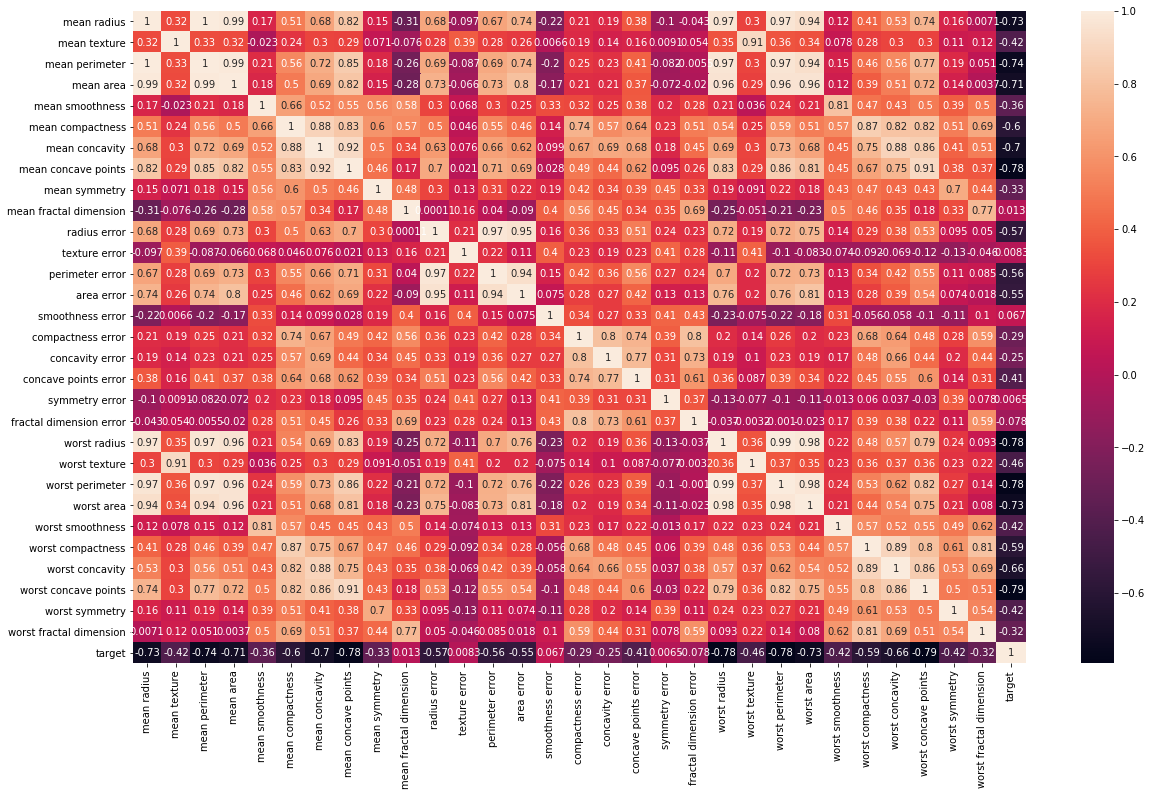

In [10]:
plt.figure(figsize=(20,12)) 
sns.heatmap(df_cancer.corr(), annot=True)

# SVM Model

Let's prepare a dataframe with only the features

In [11]:
X = df_cancer.drop(['target'], axis = 1) # We drop our "target" feature and use all the remaining features in our dataframe to train the model.

And with only the target

In [12]:
y = df_cancer['target']

## Split the dataset into train and test dataset

In [14]:
from sklearn.model_selection import train_test_split

Let's split our data using 80% for training and the remaining 20% for testing.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

## Now import the model

In [17]:
from sklearn.svm import SVC
svc_model = SVC()

Now, let's train our SVM model with our "training" dataset.¶

In [18]:
svc_model.fit(X_train, y_train)

/Users/ernesto/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Now, use the fitted model to predict target for test dataset

In [19]:
y_predict = svc_model.predict(X_test)

## Accuracy of the model

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

predicted_cancer  predicted_healthy
is_cancer                 66                  0
is_healthy                48                  0

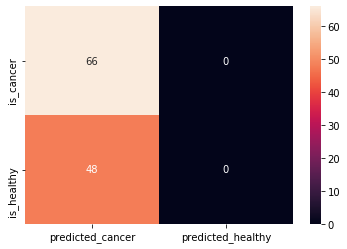

In [21]:
sns.heatmap(confusion, annot=True)

In [22]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        48
         1.0       0.58      1.00      0.73        66

   micro avg       0.58      0.58      0.58       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.34      0.58      0.42       114



/Users/ernesto/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


As we can see, our model did not do a very good job in its predictions. It predicted that 48 healthy patients have cancer.

Let's explore ways to improve the performance of our model.

## Improving our Model
The first process we will try is by Normalizing our data

Data Normalization is a feature scaling process that brings all values into range [0,1]

X' = (X-X_min) / (X_max - X_min)-----> X_range

In [23]:
X_train_min = X_train.min()
X_train_min

mean radius                  6.981000
mean texture                10.380000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.490000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [24]:
X_train_max = X_train.max()
X_train_max

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.14470
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09296
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

In [25]:
X_train_range = (X_train_max- X_train_min)
X_train_range

mean radius                  21.129000
mean texture                 28.900000
mean perimeter              144.710000
mean area                  2357.500000
mean smoothness               0.092070
mean compactness              0.326020
mean concavity                0.426800
mean concave points           0.201200
mean symmetry                 0.198000
mean fractal dimension        0.043000
radius error                  2.761500
texture error                 4.524800
perimeter error              21.223000
area error                  535.398000
smoothness error              0.029417
compactness error             0.133148
concavity error               0.396000
concave points error          0.052790
symmetry error                0.071068
fractal dimension error       0.028945
worst radius                 28.110000
worst texture                37.050000
worst perimeter             200.790000
worst area                 4068.800000
worst smoothness              0.151430
worst compactness        

In [26]:
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
412     0.114345      0.391003        0.110290   0.053150         0.293907   
461     0.967343      0.549827        0.988943   1.000000         0.605735   
532     0.317052      0.205882        0.303849   0.183245         0.435973   
495     0.373373      0.340138        0.361620   0.227953         0.469643   
13      0.419755      0.469550        0.414000   0.271135         0.340828   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
412          0.126219        0.087512             0.025487       0.108081   
461          0.550334        0.851687             0.839463       0.505556   
532          0.163088        0.041050             0.093439       0.288384   
495          0.196522        0.159888             0.246074       0.215657   
13           0.247899        0.232849             0.266600       0.397475   

     mean fractal dimension  ...  worst radius  worst texture  \
412                0.401860  ...      0.072394       0.418354   
461                0.145814  ...      1.000000       0.509582   
532                0.269535  ...      0.281750       0.208097   
495                0.174884  ...      0.287442       0.431579   
13                 0.079535  ...      0.316969       0.409447   

     worst perimeter  worst area  worst smoothness  worst compactness  \
412         0.080681    0.028460          0.247177           0.156601   
461         1.000000    1.000000          0.426137           0.386442   
532         0.254943    0.144564          0.364723           0.125263   
495         0.266398    0.147070          0.333025           0.108188   
13          0.306738    0.169903          0.276894           0.160191   

     worst concavity  worst concave points  worst symmetry  \
412         0.149201              0.088110        0.192682   
461         0.545767              0.902062        0.255643   
532         0.096326              0.299107        0.294844   
495         0.135783              0.349485        0.191019   
13          0.185463              0.384536        0.295557   

     worst fractal dimension  
412                 0.242818  
461                 0.126131  
532                 0.149416  
495                 0.071822  
13                  0.051358  

[5 rows x 30 columns]

Now, normalize the test data

In [28]:
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range

And apply the model with normalized data

In [29]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

/Users/ernesto/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

Let's examine the accuracy

In [31]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

predicted_cancer  predicted_healthy
is_cancer                 66                  0
is_healthy                 1                 47

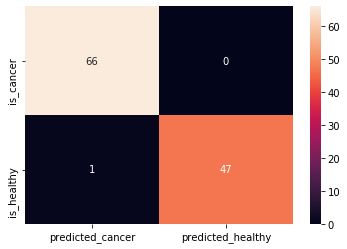

In [32]:
sns.heatmap(confusion,annot=True,fmt="d")

In [33]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        48
         1.0       0.99      1.00      0.99        66

   micro avg       0.99      0.99      0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



There is an important improvement